# Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

rahul_gandhi_df = pd.read_csv('/content/sample_data/rahul_reviews.csv')
narendra_modi_df = pd.read_csv('/content/sample_data/modi_reviews.csv')




In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
rahul_gandhi_df.head()
rahul_gandhi_df.shape

(14261, 3)

In [ ]:
narendra_modi_df.head()

narendra_modi_df.shape

(25683, 4)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    try:
        # Remove @mentions, URLs, hashtags (#hashtag), and retweets (RT)
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
        text = re.sub(r'#', '', text)  # Remove '#' symbol from hashtags
        text = re.sub(r'RT[\s]+', '', text)  # Remove RT (retweets)
        text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs

        # Lowercase the text
        text = text.lower()

        # Remove non-alphabetic characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # Join tokens back into a single string
        cleaned_text = ' '.join(tokens)

        return cleaned_text

    except Exception as e:
        # If an exception occurs, return an empty string
        return ''  # Exclude the tweet from the cleaned dataset

# Apply preprocessing to both datasets
rahul_gandhi_df['Cleaned_Tweet'] = rahul_gandhi_df['Tweet'].apply(preprocess_text)
narendra_modi_df['Cleaned_Tweet'] = narendra_modi_df['Tweet'].apply(preprocess_text)

# Remove empty rows from cleaned datasets
rahul_gandhi_df = rahul_gandhi_df[rahul_gandhi_df['Cleaned_Tweet'] != '']
narendra_modi_df = narendra_modi_df[narendra_modi_df['Cleaned_Tweet'] != '']

# Save the cleaned datasets to new CSV files
rahul_gandhi_df.to_csv('cleaned_rahul_gandhi_tweets.csv', index=False)
narendra_modi_df.to_csv('cleaned_narendra_modi_tweets.csv', index=False)

print("Preprocessing complete. Cleaned datasets saved to CSV files.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing complete. Cleaned datasets saved to CSV files.


In [ ]:
clean_rahul_df=pd.read_csv('/content/sample_data/cleaned_rahul_gandhi_tweets.csv')
clean_modi_df=pd.read_csv('/content/sample_data/cleaned_narendra_modi_tweets.csv')

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a value between -1 and 1

# Apply sentiment analysis to both cleaned datasets
clean_rahul_df['Sentiment'] = clean_rahul_df['Cleaned_Tweet'].apply(get_sentiment)
clean_modi_df['Sentiment'] = clean_modi_df['Cleaned_Tweet'].apply(get_sentiment)

# Save the datasets with sentiment scores
clean_rahul_df.to_csv('rahul_gandhi_with_sentiment.csv', index=False)
clean_modi_df.to_csv('narendra_modi_with_sentiment.csv', index=False)

print("Sentiment analysis complete. Datasets saved with sentiment scores.")


Sentiment analysis complete. Datasets saved with sentiment scores.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Example: Label the sentiment based on polarity for demonstration
# 1 for positive sentiment, 0 for negative sentiment
def label_sentiment(polarity):
    if polarity > 0:
        return 1  # Positive
    elif polarity < 0:
        return 0  # Negative
    return None  # Neutral or no sentiment

# Label sentiment based on TextBlob's polarity
clean_rahul_df['Label'] = clean_rahul_df['Sentiment'].apply(label_sentiment)
clean_modi_df['Label'] = clean_modi_df['Sentiment'].apply(label_sentiment)

# Remove rows with None labels
clean_rahul_df = clean_rahul_df[clean_rahul_df['Label'].notnull()]
clean_modi_df = clean_modi_df[clean_modi_df['Label'].notnull()]

# Prepare data for Naive Bayes
X_rahul = clean_rahul_df['Cleaned_Tweet']
y_rahul = clean_rahul_df['Label']

X_modi = clean_modi_df['Cleaned_Tweet']
y_modi = clean_modi_df['Label']

# Split the data
X_train_rahul, X_test_rahul, y_train_rahul, y_test_rahul = train_test_split(X_rahul, y_rahul, test_size=0.2, random_state=42)
X_train_modi, X_test_modi, y_train_modi, y_test_modi = train_test_split(X_modi, y_modi, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()

X_train_rahul_vec = vectorizer.fit_transform(X_train_rahul)
X_test_rahul_vec = vectorizer.transform(X_test_rahul)

X_train_modi_vec = vectorizer.fit_transform(X_train_modi)
X_test_modi_vec = vectorizer.transform(X_test_modi)

# Training Naive Bayes Classifier
nb_model_rahul = MultinomialNB()
nb_model_rahul.fit(X_train_rahul_vec, y_train_rahul)

nb_model_modi = MultinomialNB()
nb_model_modi.fit(X_train_modi_vec, y_train_modi)

# Predictions
y_pred_rahul = nb_model_rahul.predict(X_test_rahul_vec)
y_pred_modi = nb_model_modi.predict(X_test_modi_vec)

# Evaluation
print("Rahul Gandhi Sentiment Analysis:")
print(classification_report(y_test_rahul, y_pred_rahul))
print("Accuracy:", accuracy_score(y_test_rahul, y_pred_rahul))

print("\nNarendra Modi Sentiment Analysis:")
print(classification_report(y_test_modi, y_pred_modi))
print("Accuracy:", accuracy_score(y_test_modi, y_pred_modi))


Rahul Gandhi Sentiment Analysis:
              precision    recall  f1-score   support

         0.0       0.79      0.56      0.66       581
         1.0       0.81      0.93      0.87      1204

    accuracy                           0.81      1785
   macro avg       0.80      0.75      0.76      1785
weighted avg       0.81      0.81      0.80      1785

Accuracy: 0.8095238095238095

Narendra Modi Sentiment Analysis:
              precision    recall  f1-score   support

         0.0       0.81      0.53      0.64       971
         1.0       0.83      0.95      0.89      2373

    accuracy                           0.83      3344
   macro avg       0.82      0.74      0.76      3344
weighted avg       0.83      0.83      0.82      3344

Accuracy: 0.8280502392344498


In [ ]:
clean_rahul_df.to_csv('rahul_gandhi_with_sentiment_and_labels.csv', index=False)
clean_modi_df.to_csv('narendra_modi_with_sentiment_and_labels.csv', index=False)

print("Sentiment analysis complete. Datasets saved with sentiment scores and labels.")

Sentiment analysis complete. Datasets saved with sentiment scores and labels.


In [ ]:
import pandas as pd

# Load the dataset for Rahul Gandhi
file_path = '/content/rahul_gandhi_with_sentiment_and_labels.csv'
rahul_gandhi_data = pd.read_csv(file_path)

# Step 1: Total number of tweets
total_tweets = len(rahul_gandhi_data)

# Step 2: Count the number of positive tweets (where Label is 1)
positive_tweets = rahul_gandhi_data[rahul_gandhi_data['Label'] == 1].shape[0]

# Step 3: Calculate the probability of winning (positive sentiment ratio)
probability_rahul_winning = positive_tweets / total_tweets

# Output results
print(f"Total tweets: {total_tweets}")
print(f"Positive tweets: {positive_tweets}")
print(f"Probability of Rahul Gandhi winning: {probability_rahul_winning:.4f}")


Total tweets: 8925
Positive tweets: 5838
Probability of Rahul Gandhi winning: 0.6541


In [ ]:
import pandas as pd

# Load the dataset for Rahul Gandhi
file_path = '/content/narendra_modi_with_sentiment_and_labels.csv'
modi_data = pd.read_csv(file_path)

# Step 1: Total number of tweets
total_tweets = len(modi_data)

# Step 2: Count the number of positive tweets (where Label is 1)
positive_tweets = modi_data[modi_data['Label'] == 1].shape[0]

# Step 3: Calculate the probability of winning (positive sentiment ratio)
probability_modi_winning = positive_tweets / total_tweets

# Output results
print(f"Total tweets: {total_tweets}")
print(f"Positive tweets: {positive_tweets}")
print(f"Probability of Narendra Modi winning: {probability_modi_winning:.4f}")

Total tweets: 16716
Positive tweets: 11860
Probability of Narendra Modi winning: 0.7095


<ipython-input-35-2222e5c14149>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rahul_sentiment_counts.index, y=rahul_sentiment_counts.values, palette='viridis')
<ipython-input-35-2222e5c14149>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mood_sentiment_counts.index, y=mood_sentiment_counts.values, palette='magma')


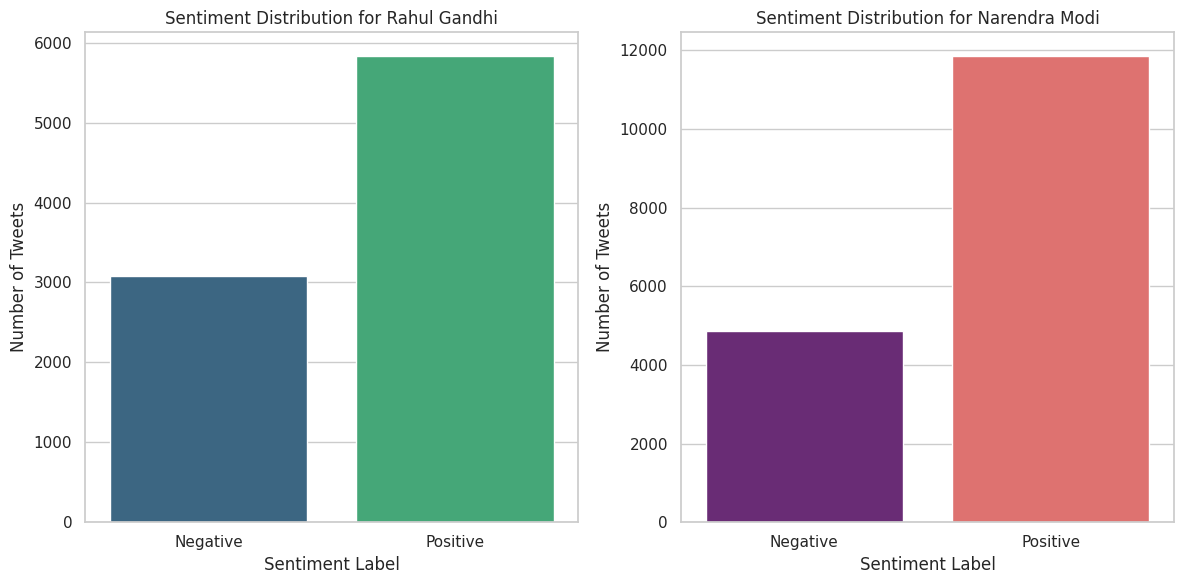

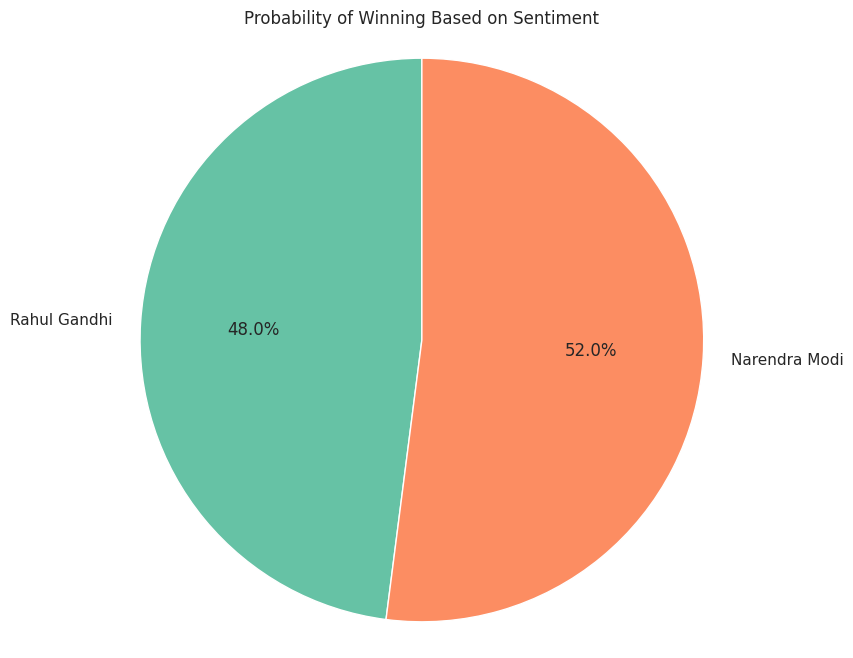

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
rahul_gandhi_data = pd.read_csv('/content/rahul_gandhi_with_sentiment_and_labels.csv')
narendra_modi_data = pd.read_csv('/content/narendra_modi_with_sentiment_and_labels.csv')

# Set up the style for seaborn
sns.set(style="whitegrid")

# Count sentiment labels for both datasets
rahul_sentiment_counts = rahul_gandhi_data['Label'].value_counts()
mood_sentiment_counts = narendra_modi_data['Label'].value_counts()

# Bar plot for Rahul Gandhi's Sentiment Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=rahul_sentiment_counts.index, y=rahul_sentiment_counts.values, palette='viridis')
plt.title("Sentiment Distribution for Rahul Gandhi")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Tweets")
plt.xticks([0, 1], ['Negative', 'Positive'])

# Bar plot for Narendra Modi's Sentiment Distribution
plt.subplot(1, 2, 2)
sns.barplot(x=mood_sentiment_counts.index, y=mood_sentiment_counts.values, palette='magma')
plt.title("Sentiment Distribution for Narendra Modi")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Tweets")
plt.xticks([0, 1], ['Negative', 'Positive'])

plt.tight_layout()
plt.show()

# Probability of winning
rahul_prob = rahul_sentiment_counts[1] / len(rahul_gandhi_data)
mood_prob = mood_sentiment_counts[1] / len(narendra_modi_data)

# Create a pie chart for probabilities
labels = ['Rahul Gandhi', 'Narendra Modi']
probabilities = [rahul_prob, mood_prob]

plt.figure(figsize=(8, 8))
plt.pie(probabilities, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title("Probability of Winning Based on Sentiment")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
